625391856
625334136


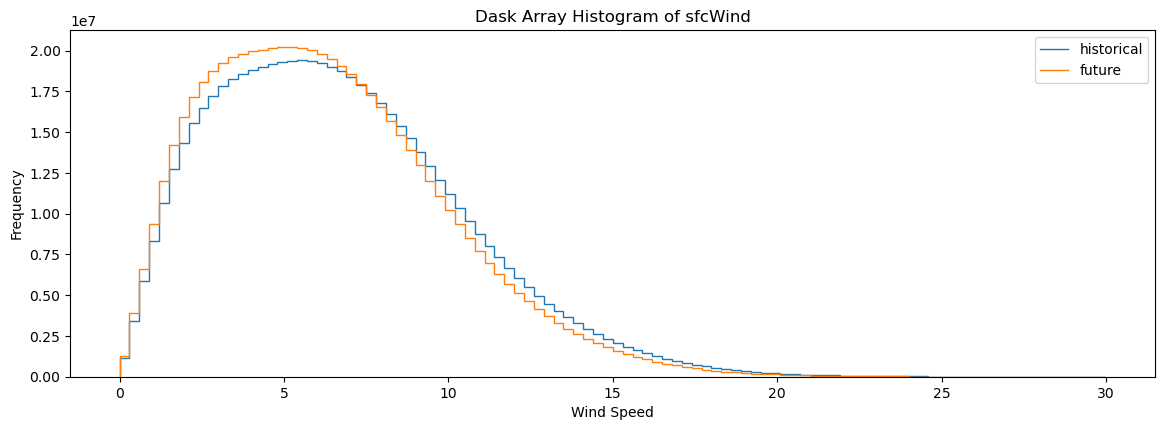

In [1]:
import xarray as xr
import dask.array as da
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(14, 4.5))
for file in ["/work/gg0302/g260190/Dunkelflaute/Wind/EUR-11_MPI-M-MPI-ESM1-2-HR_historical_CLMcom-Hereon-CCLM-6-0-clm3_wind.nc","/work/gg0302/g260190/Dunkelflaute/Wind/EUR-11_MPI-M-MPI-ESM1-2-HR_ssp370_CLMcom-Hereon-CCLM-6-0-clm3_wind.nc"]:
# Open the dataset with Dask
    ds = xr.open_dataset(file, chunks={"time": 100})

    # Filter the dataset for years 1960 to 1990
    if "historical" in file:
        ds_filtered = ds.sel(time=slice("1960-01-01", "1989-12-31"))
        label="historical"
    else:
        ds_filtered = ds.sel(time=slice("2070-01-01", "2099-12-31"))
        label="future"

    # Extract the wind data as a Dask array
    wind = ds_filtered["sfcWind"].data

    # Define histogram bins
    bins = np.linspace(0, 30, 101)

    # Compute histogram lazily, then compute the result
    counts, edges = da.histogram(wind, bins=bins)
    counts, edges = da.compute(counts, edges)
    print(sum(counts))
    plt.stairs(counts, edges,label=label)

# Plot the histogram


plt.title("Dask Array Histogram of sfcWind")
plt.xlabel("Wind Speed")
plt.ylabel("Frequency")
plt.legend()
plt.show()


10013555264


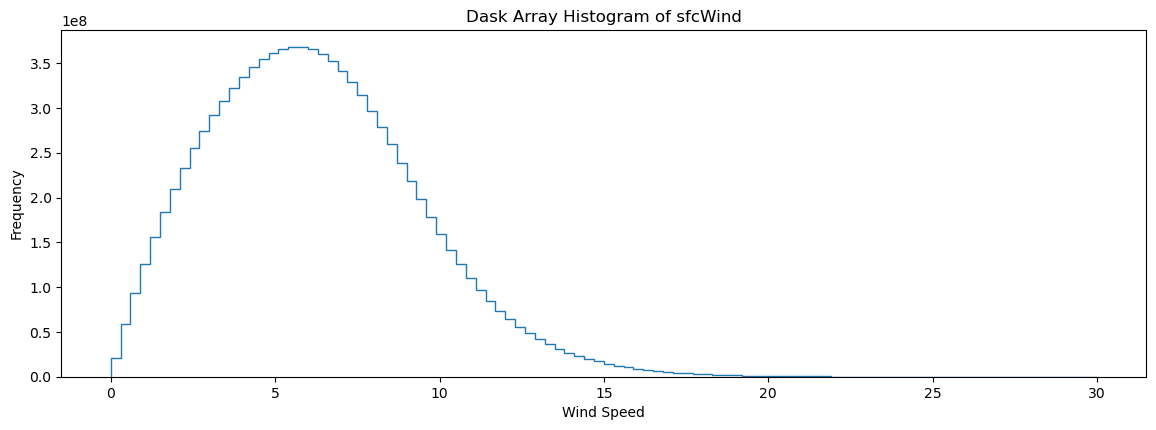

In [2]:
import xarray as xr
import dask.array as da
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(14, 4.5))
for file in ["Wind/CEU-3_MIROC-MIROC6_historical_CLMcom-KIT-CCLM-6-0-clm2_wind.nc"]:
# Open the dataset with Dask
    ds = xr.open_dataset(file, chunks={"time": 100})

    # Extract the wind data as a Dask array
    wind = ds["sfcWind"].data

    # Define histogram bins
    bins = np.linspace(0, 30, 101)

    # Compute histogram lazily, then compute the result
    counts, edges = da.histogram(wind[~da.isnan(wind)], bins=bins)
    counts, edges = da.compute(counts, edges)
    print(sum(counts))
    plt.stairs(counts, edges,label="CEU-3")

# Plot the histogram


plt.title("Dask Array Histogram of sfcWind")
plt.xlabel("Wind Speed")
plt.ylabel("Frequency")
plt.show()


In [1]:
import xarray as xr
with xr.open_dataset("/scratch/g/g260190/wind_000.nc") as df:
    print(df)
    print(df["sfcWind"].shape)
print("-"*40)
with xr.open_dataset("/scratch/g/g260190/cf_wind_000.nc") as df:
    print(df)
    print(df["CF_Wind"].shape)
print("-"*40)
with xr.open_dataset("/scratch/g/g260190/pv_000.nc") as df:
    print(df)
    print(df["CF_PV"].shape)

<xarray.Dataset> Size: 2GB
Dimensions:  (time: 8760, rlon: 209, rlat: 285)
Coordinates:
  * time     (time) datetime64[ns] 70kB 1961-01-01 ... 1961-12-31T23:00:00
  * rlon     (rlon) float64 2kB -7.599 -7.571 -7.544 ... -1.934 -1.906 -1.879
  * rlat     (rlat) float64 2kB -3.176 -3.149 -3.121 ... 4.579 4.606 4.634
    lat      (rlat, rlon) float64 477kB ...
    lon      (rlat, rlon) float64 477kB ...
    height   float64 8B ...
Data variables:
    sfcWind  (time, rlat, rlon) float32 2GB ...
(8760, 285, 209)
----------------------------------------
<xarray.Dataset> Size: 2GB
Dimensions:  (time: 8760, rlon: 209, rlat: 285)
Coordinates:
  * time     (time) datetime64[ns] 70kB 1961-01-01 ... 1961-12-31T23:00:00
  * rlon     (rlon) float64 2kB -7.599 -7.571 -7.544 ... -1.934 -1.906 -1.879
  * rlat     (rlat) float64 2kB -3.176 -3.149 -3.121 ... 4.579 4.606 4.634
    lat      (rlat, rlon) float64 477kB ...
    lon      (rlat, rlon) float64 477kB ...
    height   float64 8B ...
Data variables